# OBSERVATIONS
From this challenge we were able to observe various interesting study results for Pymaceuticals, Inc. Pymaceuticals  specializes in anti-cancer medications. Recently, it began screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer. In this study, 249 mice who were identified with SCC tumors received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.
When analyzing the summary statistics of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen I noticed that the Mean Tumor Volume,	Median Tumor Volume, Tumor Volume Variance, Tumor Volume Std.Dev, and Tumor Volume Std. Err. numbers were the smallest with mice treated with Capomulin.
Another important item to note is that the study was split with 51% male mice tested and 49% female mice.
The study analysis also included generating a line plot of tumor volume vs. time point for a mouse treated with Capomulin and the line plot shows that the more time a mouse was treated with Capomulin the smaller their tumor volume.
Lastly, it was observed that there was a correlation between mouse weight and the average tumor volume at 0.84, which showed a positive correlation between mouse weight and average tumor volume.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(study_data_complete["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# create a new dataframe from your complete dataframe
miceDF = study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
miceDF


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
miceDup = study_data_complete.loc[study_data_complete["Mouse ID"] =="g989"]
miceDup


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanDF = study_data_complete[study_data_complete["Mouse ID"] != "g989"]
cleanDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(cleanDF["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
# Do a groupby on drug regimen first
# then do mean, median, variance, standard deviation, and SEM for Tumor Volume

summaryStatsDF = cleanDF.groupby(["Drug Regimen"])

drugReg_mean = summaryStatsDF['Tumor Volume (mm3)'].mean()
drugReg_median = summaryStatsDF['Tumor Volume (mm3)'].median()
drugReg_variance = summaryStatsDF['Tumor Volume (mm3)'].var()
drugReg_stdev = summaryStatsDF['Tumor Volume (mm3)'].std()
drugReg_sem = summaryStatsDF['Tumor Volume (mm3)'].sem()


# create a new dataframe to display the information
drugSumDF = pd.DataFrame({
        "Mean Tumor Volume": drugReg_mean,
        "Median Tumor Volume": drugReg_median,
        "Tumor Volume Variance": drugReg_variance,
        "Tumor Volume Std.Dev": drugReg_stdev,
        "Tumor Volume Std. Err.": drugReg_sem
    
})

drugSumDF

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line  -use .agg

drugSummaryDF = cleanDF.groupby("Drug Regimen").agg({
    
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
})

drugSummaryDF

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

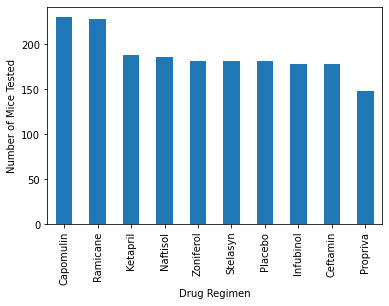

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# grab the columns from our drug regimen and then do value counts

regimenCounts = cleanDF["Drug Regimen"].value_counts()
regimenCounts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

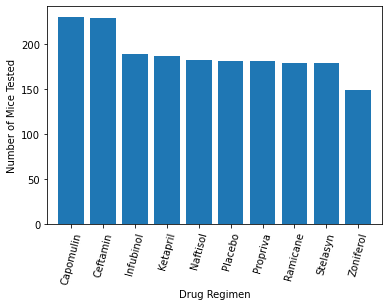

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# still use .value_counts() and plt.bar
y_axis = regimenCounts
# instead of incrementing we use len to set the ticks
x_axis = np.arange(len(regimenCounts))


tick_locations = [value for value in x_axis]
# use list comprehension to make tick mark locations for our values
plt.xticks(tick_locations,["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva",
"Ramicane", "Stelasyn", "Zoniferol"], rotation="75")

# tell matplotlib we're making a bar chart & apply attributes
plt.bar(x_axis, regimenCounts, align = "center")

# set x limits of current chart
plt.xlim(-0.75, len(x_axis)-0.25)

#label x and y axis
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")


plt.show()

In [11]:
counts = cleanDF["Sex"].value_counts()
counts

Male      958
Female    922
Name: Sex, dtype: int64

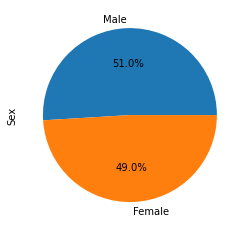

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# you can use this regimenCounts = cleanDF["Drug Regimen"].value_counts()
counts.plot(kind="pie", autopct="%1.1f%%")
plt.show()

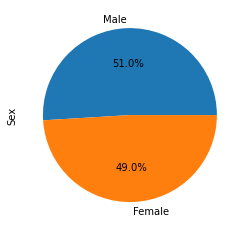

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# do same as above except plt.pie and then .value_counts() of your genders
plt.pie(counts.values, labels=counts.index.values, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# do a groupby, in order to do this you'll need your time points
# start with a groupby of your Mouse IDs then get max time points
# then merge that back to your clean dataframe and do a left join of max tumor and the mouseID & max time oints

# Start by getting the last (greatest) timepoint for each mouse
lastTumorVolume = cleanDF.groupby("Mouse ID")["Timepoint"].max()
lastTumorVolume = lastTumorVolume.reset_index()
lastTumorVolume.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_dataDF = lastTumorVolume.merge(cleanDF, on=["Mouse ID", "Timepoint"], how="left")
merged_dataDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# for each of the respective drugs in your treatment list you'll need to do a loc and then loop through each
# then populate your tumor list

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# loop through each respective treatment
# generate your inner quartile region
# generate upperbound, lowerbound, and inner region & your respective ouliers then add to tumor list

for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    finalTumorVol = merged_dataDF.loc[merged_dataDF["Drug Regimen"]== drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_list.append(finalTumorVol)
    
    # Determine outliers using upper and lower bounds
    quartiles = finalTumorVol.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lowerbound = lowerq - (1.5 * iqr)
    upperbound = upperq + (1.5 * iqr)
    outliers = finalTumorVol.loc[(finalTumorVol < lowerbound) | (finalTumorVol > upperbound)]
    
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


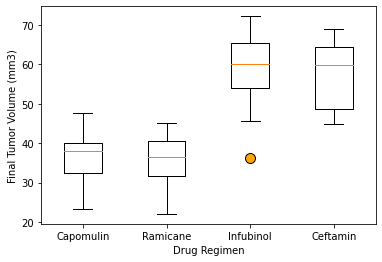

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# we'll have individual box plots for each of the respective treatments (one box for each treatment)
orange_out = dict(markerfacecolor="orange", markersize=10)
plt.boxplot(tumor_vol_list, labels=treatment_list, flierprops=orange_out)
#added Xlabel for clarity
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

In [17]:
# generate a table of all mice filtered out by those treated with Capomulin
capomulin = cleanDF.loc[cleanDF["Drug Regimen"]=="Capomulin"]
capomulin.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


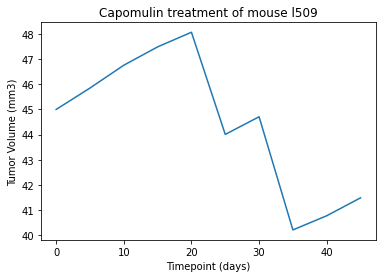

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# tell the timepoint of the treatment over a certain amount of days

# pick any mouse of your choosing and do a simple line plot
mouseData = capomulin.loc[capomulin["Mouse ID"]=="l509"]
plt.plot(mouseData["Timepoint"], mouseData["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")

plt.show()

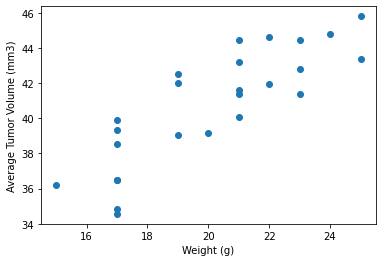

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulinAvg = capomulin.groupby("Mouse ID").mean()

plt.scatter(capomulinAvg["Weight (g)"], capomulinAvg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


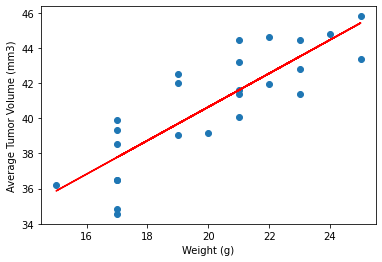

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# do a line of best fit and draw those
correlation = round(st.pearsonr(capomulinAvg["Weight (g)"], capomulinAvg["Tumor Volume (mm3)"])[0], 2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")

# model gets the y = mx+b
    #index 0 is the slope,
    #index 1 is the y intercept
    
    # calculate the y values for the linear regression model using the slope intercept equation
    # objective is to display the trendline on the plot of the average weight v. average tumor volume
model = st.linregress(capomulinAvg["Weight (g)"], capomulinAvg["Tumor Volume (mm3)"])

yValues = capomulinAvg["Weight (g)"] * model[0] + model[1]

# create the scatter plot again and then draw the line of best fit
plt.scatter(capomulinAvg["Weight (g)"], capomulinAvg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# draw the line with the linear regression line on the plot
plt.plot(capomulinAvg["Weight (g)"], yValues, color="red")
plt.show()